In [89]:
using Plots;
using Statistics;
using LinearAlgebra;
using SkewLinearAlgebra;

include("free_fermion.jl")


function power_law_fit(x,y)
    # Take log of x for linear regression
    log_x = log.(abs.(x))

    # Linear regression
    A = [ones(length(log_x)) log_x]
    coeffs = A \ log.(abs.(y))

    # Extract slope and intercept
    intercept = coeffs[1]
    slope = coeffs[2]
    return intercept, slope
end


function log_law_fit(x,y)
    # Take log of x for linear regression
    log_x = log.(abs.(x))

    # Linear regression
    A = [ones(length(log_x)) log_x]
    coeffs = A \ y

    # Extract slope and intercept
    intercept = coeffs[1]
    slope = coeffs[2]
    return intercept, slope
end

log_law_fit (generic function with 1 method)

In [7]:
A = [0 1; -1 0];
FreeFermions.diagonalize_majorana(A)

([1.0], [1.0 0.0; 0.0 1.0])

## Critical T = 0 tfd

In [84]:
L_list = collect(24:8:256)
g = 1.0;
β = 1e40;


CMI_list = zeros(size(L_list))
CMI_CP_list = zeros(size(L_list))


for (i, L) in enumerate(L_list)
    @assert isapprox(L % 8, 0)
    indxA = Vector(Int(L/2)-3:Int(L/2))
    indxB = Vector(3*Int(L/2)+1:3*Int(L/2)+4)
    indxC = Vector(Int(L/2)+1:3*Int(L/2))
    
    # M = Ising_Hamiltonian_M(L);
    M = FF.Ising_Hamiltonian(L, g);
    G = FF.thermal_state_correlation(M, β);
    CMI_list[i] = FF.compute_CMI_majorana(G,indxA, indxB, indxC);
    
    G_CP = FF.tfd_correlation(M, β);
    CMI_CP_list[i] = FF.compute_CMI_CP_majorana(G_CP,indxA, indxB, indxC);
end
    

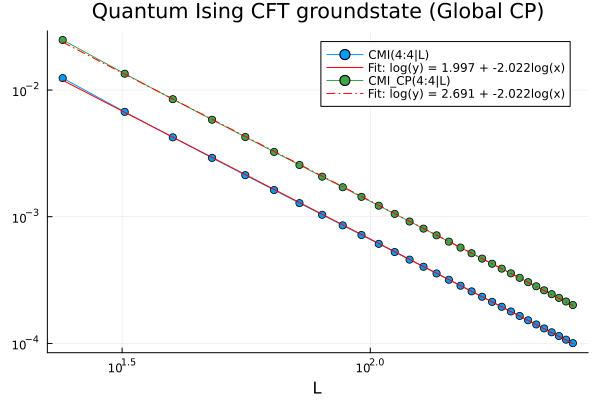

"/Users/subhayansahu/Library/CloudStorage/GoogleDrive-unabindranath75@gmail.com/My Drive/Research/2024/Research_Local/Ideas/Free fermions/GS_Ising_CFT_globalCP.pdf"

In [85]:
intercept1, slope1 = power_law_fit(L_list,  CMI_list)
# Plot original data and fit line
p = plot(L_list,  CMI_list, 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI(4:4|L)")
plot!(L_list, exp(intercept1) .* (L_list).^slope1,
    color = :red,
      label = "Fit: log(y) = $(round(intercept1; digits=3)) + $(round(slope1; digits=3))log(x)")


intercept2, slope2 = power_law_fit(L_list,CMI_CP_list)
# Plot original data and fit line
plot!(L_list, CMI_CP_list, 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI_CP(4:4|L)")
plot!(L_list, exp(intercept2) .* (L_list).^slope2, 
    color = :red,
    linestyle = :dashdot,
      label = "Fit: log(y) = $(round(intercept2; digits=3)) + $(round(slope2; digits=3))log(x)",
        title = "Quantum Ising CFT groundstate (Global CP)",
    xlabel = "L")


display(p)

savefig(p, "GS_Ising_CFT_globalCP.pdf")

### Off critical

In [75]:
L_list = collect(24:8:256)
g = 1.2;
β = 1e40;


CMI_list = zeros(size(L_list))
CMI_CP_list = zeros(size(L_list))


for (i, L) in enumerate(L_list)
    @assert isapprox(L % 8, 0)
    indxA = Vector(Int(L/2)-3:Int(L/2))
    indxB = Vector(3*Int(L/2)+1:3*Int(L/2)+4)
    indxC = Vector(Int(L/2)+1:3*Int(L/2))
    
    # M = Ising_Hamiltonian_M(L);
    M = FF.Ising_Hamiltonian(L, g);
    G = FF.thermal_state_correlation(M, β);
    CMI_list[i] = FF.compute_CMI_majorana(G,indxA, indxB, indxC);
    
    G_CP = FF.tfd_correlation(M, β);
    CMI_CP_list[i] = FF.compute_CMI_CP_majorana(G_CP,indxA, indxB, indxC);
end
    

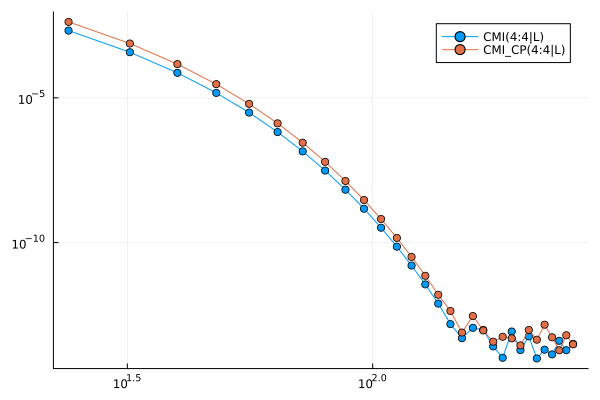

"/Users/subhayansahu/Library/CloudStorage/GoogleDrive-unabindranath75@gmail.com/My Drive/Research/2024/Research_Local/Ideas/Free fermions/GS_Ising_gapped_globalCP.pdf"

In [78]:
# intercept1, slope1 = power_law_fit(L_list,  CMI_list)
# Plot original data and fit line
p = plot(L_list,  abs.(CMI_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI(4:4|L)")
# plot!(L_list, exp(intercept1) .* (L_list).^slope1,
#     color = :red,
#       label = "Fit: log(y) = $(round(intercept1; digits=3)) + $(round(slope1; digits=3))log(x)")


# intercept2, slope2 = power_law_fit(L_list,CMI_CP_list)
# Plot original data and fit line
plot!(L_list, abs.(CMI_CP_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI_CP(4:4|L)")
# plot!(L_list, exp(intercept2) .* (L_list).^slope2, 
#     color = :red,
#     linestyle = :dashdot,
#       label = "Fit: log(y) = $(round(intercept2; digits=3)) + $(round(slope2; digits=3))log(x)",
#         title = "Quantum Ising gapped groundstate (Global CP)",
#     xlabel = "L")


display(p)

savefig(p, "GS_Ising_gapped_globalCP.pdf")

## Critical T = 0 local CP

In [68]:
L_tot = 512;
g = 1.0;
β = 1e40;

M = FF.Ising_Hamiltonian(L_tot, g);
G_gs = FF.thermal_state_correlation(M, β);

L_list = collect(24:8:256)
CMI_list = zeros(size(L_list))
CMI_CP_list = zeros(size(L_list))

for (i, L) in enumerate(L_list)
    # @assert isapprox(L % 8, 0)
    indxABC = Vector(Int(L_tot)-Int(L/2)+1:Int(L_tot)+Int(L/2))
    G_red = FF.extract_submatrix(G_gs, indxABC);
    G_CP = FF.canonical_purification(G_red);
    indxA = Vector(1:4)
    indxB = Vector(Int(L)-3:Int(L))
    indxC = Vector(5:Int(L)-4)
    
    CMI_list[i] = FF.compute_CMI_majorana(G_red,indxA, indxB, indxC);
    CMI_CP_list[i] = FF.compute_CMI_CP_majorana(G_CP,indxA, indxB, indxC);
end

    

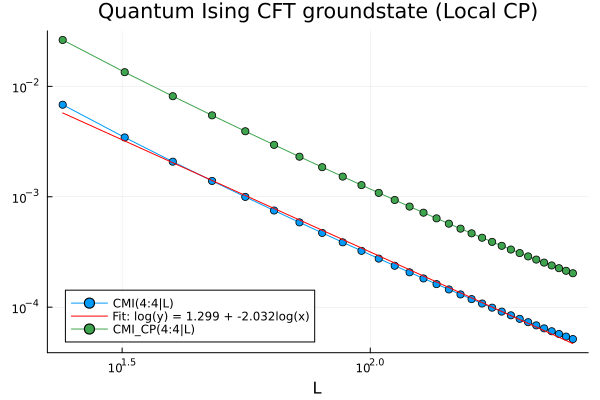

"/Users/subhayansahu/Library/CloudStorage/GoogleDrive-unabindranath75@gmail.com/My Drive/Research/2024/Research_Local/Ideas/Free fermions/GS_Ising_CFT_localCP.pdf"

In [69]:
intercept1, slope1 = power_law_fit(L_list, CMI_list)
# Plot original data and fit line
p = plot(L_list,  CMI_list, 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI(4:4|L)")
plot!(L_list, exp(intercept1) .* (L_list).^slope1,
    color = :red,
      label = "Fit: log(y) = $(round(intercept1; digits=3)) + $(round(slope1; digits=3))log(x)")

# intercept2, slope2 = power_law_fit(L_list,I_CP_list)
# Plot original data and fit line
plot!(L_list, CMI_CP_list, 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI_CP(4:4|L)",
    legend = :bottomleft,
    title = "Quantum Ising CFT groundstate (Local CP)",
    xlabel = "L")
# plot!(L_list, exp(intercept2) .* (L_list).^slope2, 
#     color = :red,
#     linestyle = :dash,
#       label = "Fit: log(y) = $(round(intercept2; digits=3)) + $(round(slope2; digits=3))log(x)",
#         title = "GS CMI")

display(p)

savefig(p, "GS_Ising_CFT_localCP.pdf")

### Off critical

In [79]:
L_tot = 512;
g = 1.2;
β = 1e40;

M = FF.Ising_Hamiltonian(L_tot, g);
G_gs = FF.thermal_state_correlation(M, β);

L_list = collect(24:8:256)
CMI_list = zeros(size(L_list))
CMI_CP_list = zeros(size(L_list))

for (i, L) in enumerate(L_list)
    # @assert isapprox(L % 8, 0)
    indxABC = Vector(Int(L_tot)-Int(L/2)+1:Int(L_tot)+Int(L/2))
    G_red = FF.extract_submatrix(G_gs, indxABC);
    G_CP = FF.canonical_purification(G_red);
    indxA = Vector(1:4)
    indxB = Vector(Int(L)-3:Int(L))
    indxC = Vector(5:Int(L)-4)
    
    CMI_list[i] = FF.compute_CMI_majorana(G_red,indxA, indxB, indxC);
    CMI_CP_list[i] = FF.compute_CMI_CP_majorana(G_CP,indxA, indxB, indxC);
end


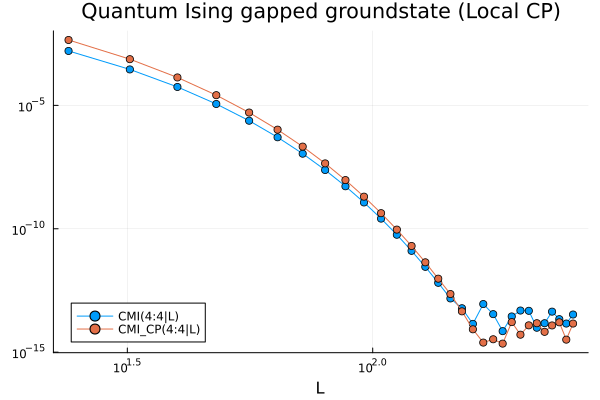

"/Users/subhayansahu/Library/CloudStorage/GoogleDrive-unabindranath75@gmail.com/My Drive/Research/2024/Research_Local/Ideas/Free fermions/GS_Ising_gapped_localCP.pdf"

In [81]:
# intercept1, slope1 = power_law_fit(L_list, CMI_list)
# Plot original data and fit line
p = plot(L_list,  abs.(CMI_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI(4:4|L)")
# plot!(L_list, exp(intercept1) .* (L_list).^slope1,
#     color = :red,
#       label = "Fit: log(y) = $(round(intercept1; digits=3)) + $(round(slope1; digits=3))log(x)")

# intercept2, slope2 = power_law_fit(L_list,I_CP_list)
# Plot original data and fit line
plot!(L_list, abs.(CMI_CP_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI_CP(4:4|L)",
    legend = :bottomleft,
    title = "Quantum Ising gapped groundstate (Local CP)",
    xlabel = "L")
# plot!(L_list, exp(intercept2) .* (L_list).^slope2, 
#     color = :red,
#     linestyle = :dash,
#       label = "Fit: log(y) = $(round(intercept2; digits=3)) + $(round(slope2; digits=3))log(x)",
#         title = "GS CMI")

display(p)

savefig(p, "GS_Ising_gapped_localCP.pdf")

## Critical T > 0 tfd

In [86]:
L_list = collect(24:8:512)
g = 1.0;
β = 100.0;


CMI_list = zeros(size(L_list))
CMI_CP_list = zeros(size(L_list))

for (i, L) in enumerate(L_list)
    @assert isapprox(L % 8, 0)
    indxA = Vector(Int(L/2)-3:Int(L/2))
    indxB = Vector(3*Int(L/2)+1:3*Int(L/2)+4)
    indxC = Vector(Int(L/2)+1:3*Int(L/2))
    
    
    M = FF.Ising_Hamiltonian(L, g);
    G = FF.thermal_state_correlation(M, β);
    CMI_list[i] = FF.compute_CMI_majorana(G,indxA, indxB, indxC);
    
    G_CP = FF.tfd_correlation(M, β);
    CMI_CP_list[i] = FF.compute_CMI_CP_majorana(G_CP,indxA, indxB, indxC);

end

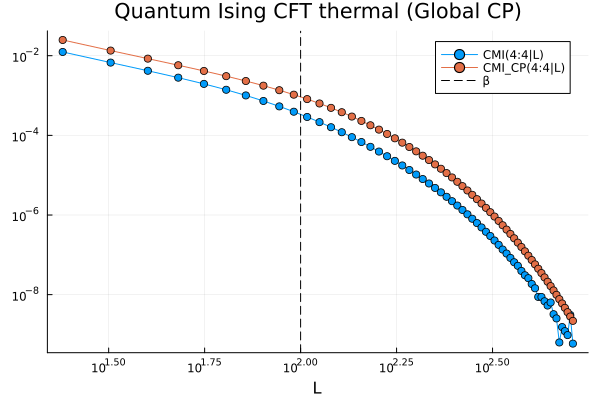

"/Users/subhayansahu/Library/CloudStorage/GoogleDrive-unabindranath75@gmail.com/My Drive/Research/2024/Research_Local/Ideas/Free fermions/Thermal_Ising_CFT_globalCP.pdf"

In [87]:
# intercept1, slope1 = power_law_fit(L_list,I_list)
# Plot original data and fit line
p = plot(L_list, abs.(CMI_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI(4:4|L)")
# plot!(L_list, exp(intercept1) .* (L_list).^slope1,
#     color = :red,
#       label = "Fit: log(y) = $(round(intercept1; digits=3)) + $(round(slope1; digits=3))log(x)")

# intercept2, slope2 = power_law_fit(L_list,I_CP_list)
# Plot original data and fit line
plot!(L_list, abs.(CMI_CP_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
    xlabel = "L",
    title = "Quantum Ising CFT thermal (Global CP)",
     label = "CMI_CP(4:4|L)")
# plot!(L_list, exp(intercept2) .* (L_list).^slope2, 
#     color = :red,
#     linestyle = :dash,
#       label = "Fit: log(y) = $(round(intercept2; digits=3)) + $(round(slope2; digits=3))log(x)",
#         title = "Thermal CMI")

vline!([100], label="β", color=:black, linestyle=:dash)

display(p)

savefig(p, "Thermal_Ising_CFT_globalCP.pdf")

### Off critical

In [71]:
L_list = collect(24:8:512)
g = 1.2;
β = 100.0;


CMI_list = zeros(size(L_list))
CMI_CP_list = zeros(size(L_list))

for (i, L) in enumerate(L_list)
    @assert isapprox(L % 8, 0)
    indxA = Vector(Int(L/2)-3:Int(L/2))
    indxB = Vector(3*Int(L/2)+1:3*Int(L/2)+4)
    indxC = Vector(Int(L/2)+1:3*Int(L/2))
    
    
    M = FF.Ising_Hamiltonian(L, g);
    G = FF.thermal_state_correlation(M, β);
    CMI_list[i] = FF.compute_CMI_majorana(G,indxA, indxB, indxC);
    
    G_CP = FF.tfd_correlation(M, β);
    CMI_CP_list[i] = FF.compute_CMI_CP_majorana(G_CP,indxA, indxB, indxC);

end

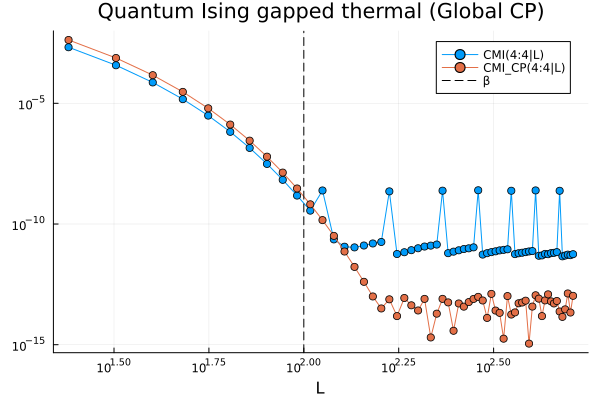

"/Users/subhayansahu/Library/CloudStorage/GoogleDrive-unabindranath75@gmail.com/My Drive/Research/2024/Research_Local/Ideas/Free fermions/Thermal_Ising_gapped_globalCP.pdf"

In [72]:
# intercept1, slope1 = power_law_fit(L_list,I_list)
# Plot original data and fit line
p = plot(L_list, abs.(CMI_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI(4:4|L)")
# plot!(L_list, exp(intercept1) .* (L_list).^slope1,
#     color = :red,
#       label = "Fit: log(y) = $(round(intercept1; digits=3)) + $(round(slope1; digits=3))log(x)")

# intercept2, slope2 = power_law_fit(L_list,I_CP_list)
# Plot original data and fit line
plot!(L_list, abs.(CMI_CP_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
    xlabel = "L",
    title = "Quantum Ising gapped thermal (Global CP)",
     label = "CMI_CP(4:4|L)")
# plot!(L_list, exp(intercept2) .* (L_list).^slope2, 
#     color = :red,
#     linestyle = :dash,
#       label = "Fit: log(y) = $(round(intercept2; digits=3)) + $(round(slope2; digits=3))log(x)",
#         title = "Thermal CMI")

vline!([100], label="β", color=:black, linestyle=:dash)

display(p)

savefig(p, "Thermal_Ising_gapped_globalCP.pdf")

## Critical T > 0 local CP

In [63]:
L_tot = 1024;
g = 1.0;
β = 100.0;

M = FF.Ising_Hamiltonian(L_tot, g);
G_gs = FF.thermal_state_correlation(M, β);

L_list = collect(24:8:512)
CMI_list = zeros(size(L_list))
CMI_CP_list = zeros(size(L_list))

for (i, L) in enumerate(L_list)
    # @assert isapprox(L % 8, 0)
    indxABC = Vector(Int(L_tot)-Int(L/2)+1:Int(L_tot)+Int(L/2))
    G_red = FF.extract_submatrix(G_gs, indxABC);
    G_CP = FF.canonical_purification(G_red);
    indxA = Vector(1:4)
    indxB = Vector(Int(L)-3:Int(L))
    indxC = Vector(5:Int(L)-4)
    
    # M = Ising_Hamiltonian_M(L);
    
    CMI_list[i] = FF.compute_CMI_majorana(G_red,indxA, indxB, indxC);
    CMI_CP_list[i] = FF.compute_CMI_CP_majorana(G_CP,indxA, indxB, indxC);
end

    

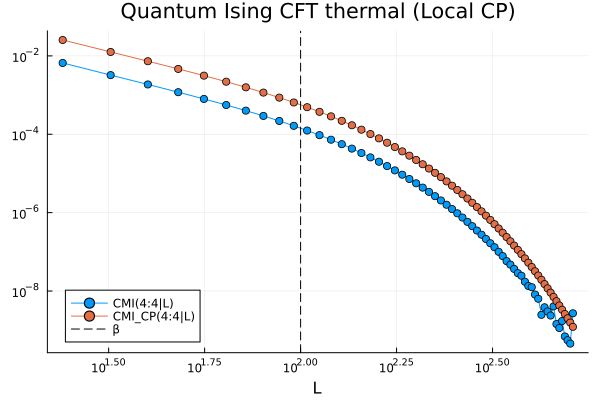

"/Users/subhayansahu/Library/CloudStorage/GoogleDrive-unabindranath75@gmail.com/My Drive/Research/2024/Research_Local/Ideas/Free fermions/Thermal_Ising_CFT_localCP.pdf"

In [65]:
# intercept1, slope1 = power_law_fit(L_list, CMI_list)
# Plot original data and fit line
p = plot(L_list,  abs.(CMI_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI(4:4|L)")
# plot!(L_list, exp(intercept1) .* (L_list).^slope1,
#     color = :red,
#       label = "Fit: log(y) = $(round(intercept1; digits=3)) + $(round(slope1; digits=3))log(x)")

# intercept2, slope2 = power_law_fit(L_list,I_CP_list)
# Plot original data and fit line
plot!(L_list, abs.(CMI_CP_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI_CP(4:4|L)",
    legend = :bottomleft,
    title = "Quantum Ising CFT thermal (Local CP)",
    xlabel = "L")
# plot!(L_list, exp(intercept2) .* (L_list).^slope2, 
#     color = :red,
#     linestyle = :dash,
#       label = "Fit: log(y) = $(round(intercept2; digits=3)) + $(round(slope2; digits=3))log(x)",
#         title = "GS CMI")
vline!([100], label="β", color=:black, linestyle=:dash)

display(p)

savefig(p, "Thermal_Ising_CFT_localCP.pdf")

### Off critical

In [73]:
L_tot = 1024;
g = 1.2;
β = 100.0;

M = FF.Ising_Hamiltonian(L_tot, g);
G_gs = FF.thermal_state_correlation(M, β);

L_list = collect(24:8:512)
CMI_list = zeros(size(L_list))
CMI_CP_list = zeros(size(L_list))

for (i, L) in enumerate(L_list)
    # @assert isapprox(L % 8, 0)
    indxABC = Vector(Int(L_tot)-Int(L/2)+1:Int(L_tot)+Int(L/2))
    G_red = FF.extract_submatrix(G_gs, indxABC);
    G_CP = FF.canonical_purification(G_red);
    indxA = Vector(1:4)
    indxB = Vector(Int(L)-3:Int(L))
    indxC = Vector(5:Int(L)-4)
    
    # M = Ising_Hamiltonian_M(L);
    
    CMI_list[i] = FF.compute_CMI_majorana(G_red,indxA, indxB, indxC);
    CMI_CP_list[i] = FF.compute_CMI_CP_majorana(G_CP,indxA, indxB, indxC);
end

    

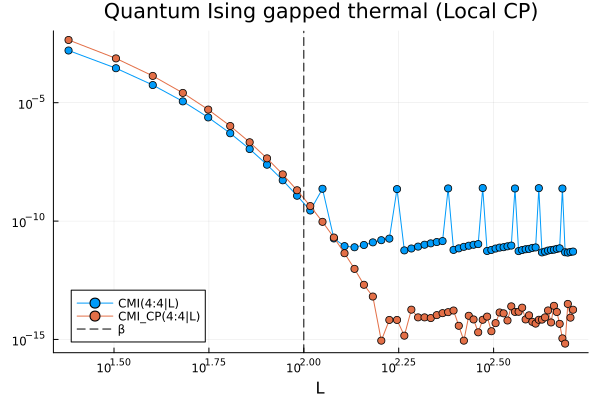

"/Users/subhayansahu/Library/CloudStorage/GoogleDrive-unabindranath75@gmail.com/My Drive/Research/2024/Research_Local/Ideas/Free fermions/Thermal_Ising_gapped_localCP.pdf"

In [74]:
# intercept1, slope1 = power_law_fit(L_list, CMI_list)
# Plot original data and fit line
p = plot(L_list,  abs.(CMI_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI(4:4|L)")
# plot!(L_list, exp(intercept1) .* (L_list).^slope1,
#     color = :red,
#       label = "Fit: log(y) = $(round(intercept1; digits=3)) + $(round(slope1; digits=3))log(x)")

# intercept2, slope2 = power_law_fit(L_list,I_CP_list)
# Plot original data and fit line
plot!(L_list, abs.(CMI_CP_list), 
     xaxis = :log, 
     yaxis = :log, 
     marker = :circle, 
     label = "CMI_CP(4:4|L)",
    legend = :bottomleft,
    title = "Quantum Ising gapped thermal (Local CP)",
    xlabel = "L")
# plot!(L_list, exp(intercept2) .* (L_list).^slope2, 
#     color = :red,
#     linestyle = :dash,
#       label = "Fit: log(y) = $(round(intercept2; digits=3)) + $(round(slope2; digits=3))log(x)",
#         title = "GS CMI")
vline!([100], label="β", color=:black, linestyle=:dash)

display(p)

savefig(p, "Thermal_Ising_gapped_localCP.pdf")

## Random FGS

In [90]:

@time begin
num_sample = 1e4
L = 12
@assert L % 2 == 0


cmi = Vector{Float64}()
cmi_cp = Vector{Float64}()

cmi2 = Vector{Float64}()
cmi_cp2 = Vector{Float64}()
for i in 1:num_sample

    indxA = Vector(1:Int(L/2))
    indxC = Vector(Int(L/2)+1:3*Int(L/2))
    indxB = Vector(3*Int(L/2)+1:2L)

    G = FF.generate_random_corrMat(L); 
    G_CP = FF.canonical_purification(G);
    x = FF.compute_CMI_majorana(G, indxA, indxB, indxC)
    y = FF.compute_CMI_CP_majorana(G_CP, indxA, indxB, indxC)
    push!(cmi, x)
    push!(cmi_cp, y)

    indxA = Vector(1:2)
    indxC = Vector(3:2L-2)
    indxB = Vector(2L-1:2L)

    x = FF.compute_CMI_majorana(G, indxA, indxB, indxC)
    y = FF.compute_CMI_CP_majorana(G_CP, indxA, indxB, indxC)
    push!(cmi2, x)
    push!(cmi_cp2, y)
end    
scatter(cmi, cmi_cp, 
   label="I(6:6|12)",
   xlabel="CMI",
   ylabel="CMI_CP",
   title="Random Gaussian States of 24 Majorana modes")

scatter!(cmi2, cmi_cp2, 
   label="I(2:2|20)")
# plot!(cmi, cmi)
v = vcat(cmi, cmi2)
plot!(v,v)
end
savefig("fermionic_gaussian_random_2.png")


 92.615072 seconds (3.24 M allocations: 10.392 GiB, 0.82% gc time, 0.14% compilation time)


"/Users/subhayansahu/Library/CloudStorage/GoogleDrive-unabindranath75@gmail.com/My Drive/Research/2024/Research_Local/Ideas/Free fermions/fermionic_gaussian_random_2.png"

In [107]:
function assert_gaussian(M::Matrix{T}) where T 
    
    t1 = true
    try
        @assert isapprox(M, - Transpose(M))
        t1 = true  # Returns true if assertion passes
    catch
        t1 = false  # Returns false if assertion fails
    end
    
    t2 = true
    
    vec = eigvals(Transpose(M)*M - I)
    try        
        @assert all(x -> x <= 0, vec)
        t2 = true  # Returns true if assertion passes
    catch
        t2 = false  # Returns false if assertion fails
    end
    
    
    return t1 & t2
   
end
    
assert_gaussian(G)


true

In [93]:
vec = cmi_cp2- cmi2;
minimum(vec[vec.< 0.0])

-0.013662989284824567

In [111]:

num_sample = 1e3
L = 16
@assert L % 2 == 0


cmi = Vector{Float64}()
cmi_cp = Vector{Float64}()

G = FF.generate_random_corrMat(L);
x = 0.0; y = 0.0
for i in 1:num_sample


    G = FF.generate_random_corrMat(L); 
    G_CP = FF.canonical_purification(G);
    

    indxA = Vector(1:2)
    indxC = Vector(3:2L-2)
    indxB = Vector(2L-1:2L)

    x = FF.compute_CMI_majorana(G, indxA, indxB, indxC)
    y = FF.compute_CMI_CP_majorana(G_CP, indxA, indxB, indxC)
    push!(cmi, x)
    push!(cmi_cp, y)
        
    if y < x
        println(assert_gaussian(G))
        println("counter_example")
        break 
    end    
    
end    


true
counter_example


In [114]:
x, y

(0.0625667480766765, 0.04949927419859779)

In [52]:
a = eigvals(G * G - I);

In [57]:
a[a .> 0]

Float64[]